In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon_sales_dataset.csv", low_memory=False)
df.dropna(axis=1, how='all', inplace=True)  

In [3]:
df = df.dropna(subset=['Order ID', 'Date', 'Qty', 'Amount'])  
df = df[df['Status'].str.lower() == 'shipped'] 
df = df[df['Amount'] > 0]  

In [4]:
print(df['Date'].head(10))


2     4/30/2022
4     4/30/2022
5     4/30/2022
6     4/30/2022
9     4/30/2022
10    4/30/2022
11    4/30/2022
13    4/30/2022
16    4/30/2022
17    4/30/2022
Name: Date, dtype: object


In [5]:
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [6]:

df['Month'] = df['Date'].dt.to_period('M')
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [7]:
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [8]:
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col or 'promotion' in col], errors='ignore')

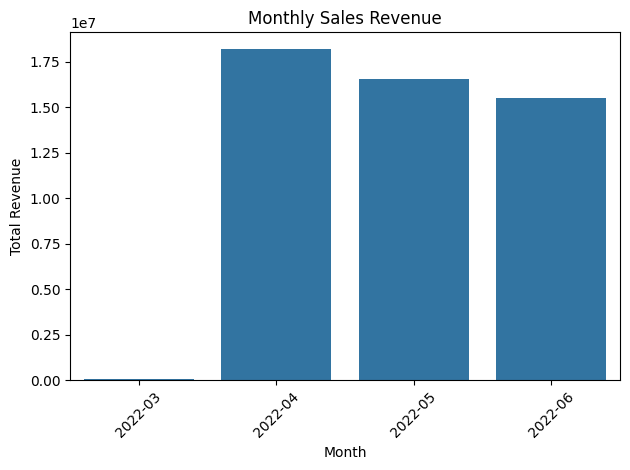

In [9]:
# Monthly Sales Trend
monthly_sales = df.groupby('Month').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

sns.barplot(data=monthly_sales, x='Month', y='Amount')
plt.xticks(rotation=45)
plt.title("Monthly Sales Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

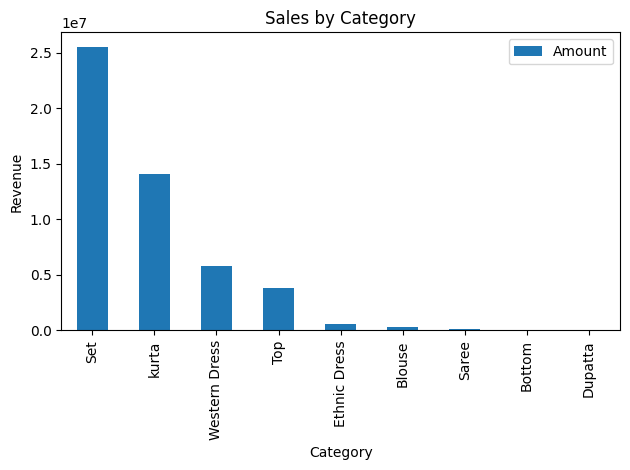

In [10]:
# Category-wise Sales
category_sales = df.groupby('Category').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False)

category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

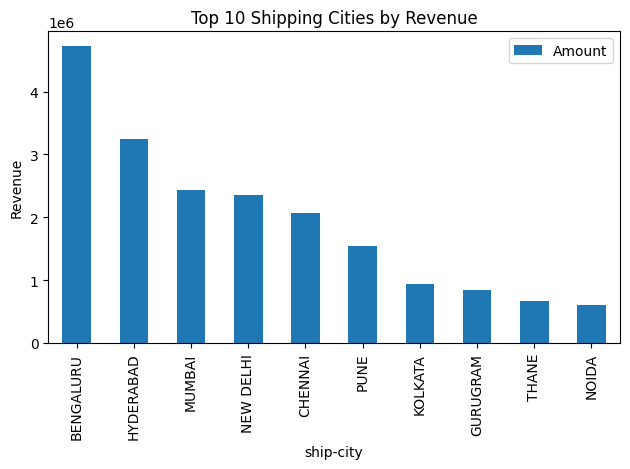

In [11]:
# Top Cities by Sales
city_sales = df.groupby('ship-city').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(10)

city_sales.plot(kind='bar')
plt.title("Top 10 Shipping Cities by Revenue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [12]:
print(df['fulfilled-by'].unique())
print(df['fulfilled-by'].value_counts())


[nan]
Series([], Name: count, dtype: int64)


In [13]:
print(df.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'fulfilled-by',
       'Month', 'Year', 'Day'],
      dtype='object')


In [14]:
print(df[['Fulfilment', 'Courier Status', 'Status']].dropna().head(10))


   Fulfilment Courier Status   Status
2      Amazon        Shipped  Shipped
4      Amazon        Shipped  Shipped
5      Amazon        Shipped  Shipped
6      Amazon        Shipped  Shipped
9      Amazon        Shipped  Shipped
10     Amazon        Shipped  Shipped
11     Amazon        Shipped  Shipped
13     Amazon        Shipped  Shipped
16     Amazon        Shipped  Shipped
17     Amazon        Shipped  Shipped


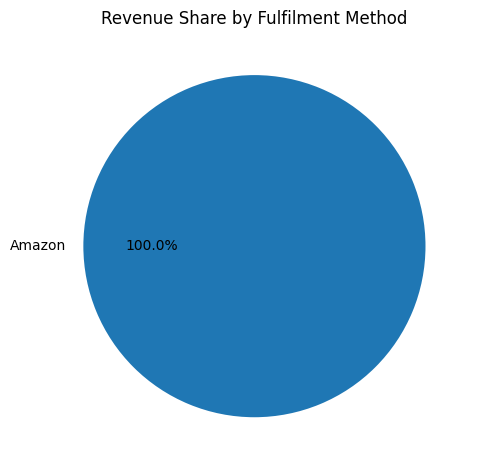

In [15]:
df['Fulfilment'] = df['Fulfilment'].str.strip().str.title()

fulfillment_sales = (
    df[df['Fulfilment'].notna()]
    .groupby('Fulfilment')
    .agg({'Amount': 'sum'})
    .sort_values(by='Amount', ascending=False)
)

if not fulfillment_sales.empty:
    fulfillment_sales.plot(kind='pie', y='Amount', autopct='%1.1f%%', legend=False)
    plt.title("Revenue Share by Fulfilment Method")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


In [16]:
# Total Revenue
total_revenue = df['Amount'].sum()
total_orders = df['Order ID'].nunique()
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")

Total Revenue: $50,324,255.00
Total Orders: 71193
